### Import Library Yang Akan Digunakan


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score 
from sklearn.cluster import  KMeans
import matplotlib.pyplot as plt


### Read Data

In [25]:
df = pd.read_csv('Breast_Cancer.csv')
df.head(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


### Mengecek Columns dengan type object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

### Encoding data yang bertype object menggunakan OrdinalEncoder

In [27]:
ordinal_enc = OrdinalEncoder()
df['Race'] = ordinal_enc.fit_transform(df[['Race']])
df['Marital Status'] = ordinal_enc.fit_transform(df[['Marital Status']])
df['N Stage'] = ordinal_enc.fit_transform(df[['N Stage']])
df['6th Stage'] = ordinal_enc.fit_transform(df[['6th Stage']])
df['differentiate'] = ordinal_enc.fit_transform(df[['differentiate']])
df['Grade'] = ordinal_enc.fit_transform(df[['Grade']])
df['A Stage'] = ordinal_enc.fit_transform(df[['A Stage']])
df['Estrogen Status'] = ordinal_enc.fit_transform(df[['Estrogen Status']])
df['Progesterone Status'] = ordinal_enc.fit_transform(df[['Progesterone Status']])
df['Status'] = ordinal_enc.fit_transform(df[['Status']])

### Membuat variable x untuk klasterisasi

In [28]:
x = df[['Race','Marital Status', 'N Stage','6th Stage','differentiate','Grade','A Stage','Estrogen Status','Progesterone Status','Status']]

In [29]:
kmeans_var = KMeans(n_clusters=8)
kmeans_var.fit(x)

KMeans()

In [30]:
labels = kmeans_var.labels_
print(labels)

[5 3 1 ... 0 0 0]


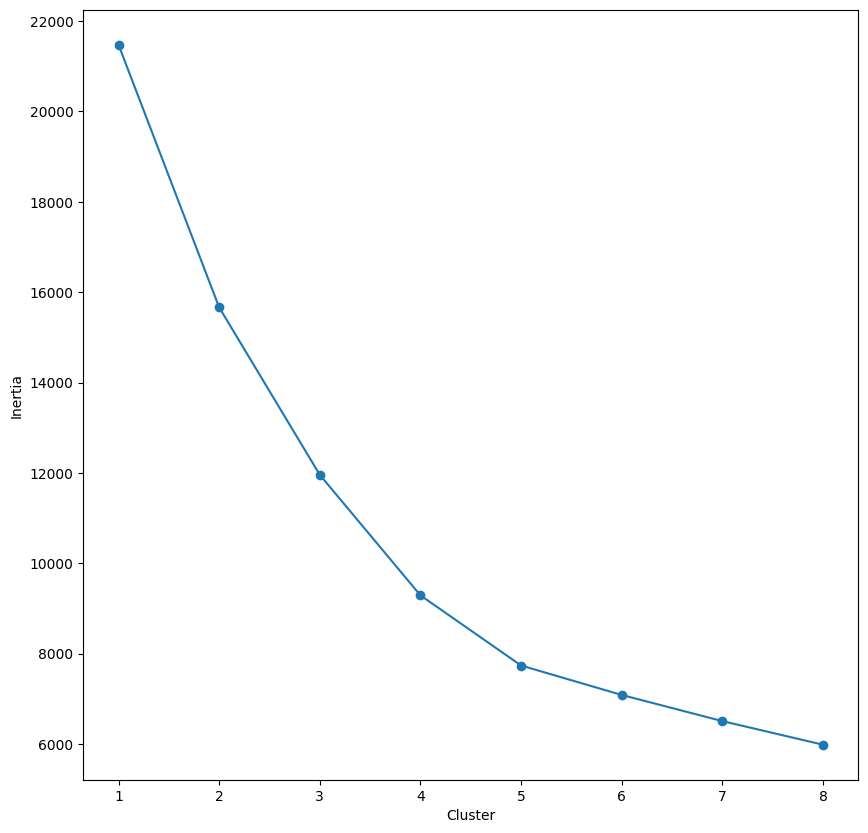

In [32]:
ks = range(1, 9)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)

plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()